In [5]:
import abtem
import ase
from ase import io as aio
import numpy as np

num atoms: 512 | cell size: Cell([21.72, 21.72, 21.72])
(512, 3)


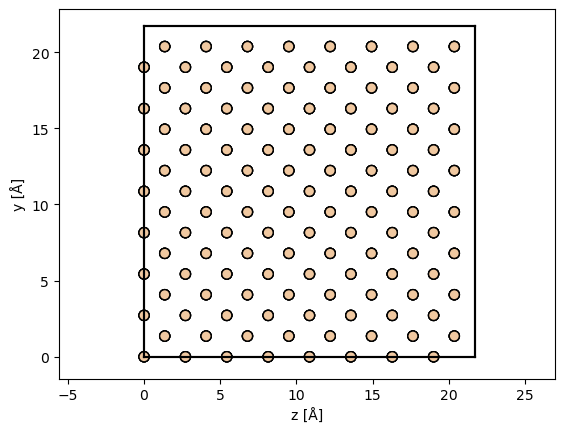

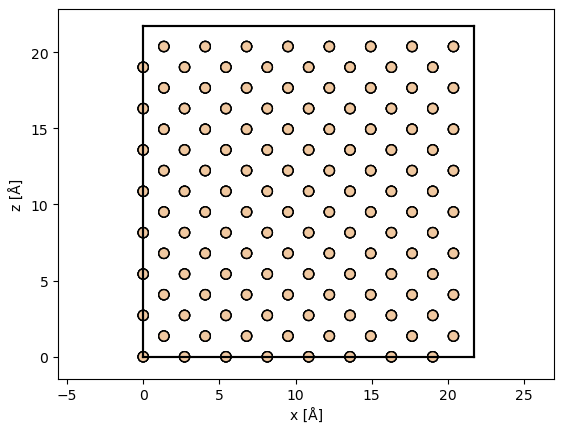

In [ ]:
material = species = "Si"
tiling = [4,4,4]
atoms = ase.build.bulk(material, cubic=True) * tiling
print(f"num atoms: {len(atoms)} | cell size: {atoms.cell}")

# 

abtem.show_atoms(atoms, scale_atoms=0.3, plane='zy');
abtem.show_atoms(atoms, scale_atoms=0.3, plane='xz');

np.shape(atoms.positions)






In [ ]:
np.savetxt(f"atoms_positions_{species}.txt",atoms.positions)

In [ ]:
def sliceStructure(sampling, slice_thickness, N_frozen_phonons, device = "cpu"):
    
    frozen_phonons = abtem.FrozenPhonons(
        atoms,
        N_frozen_phonons,
        sigmas=0.03,
        seed=42,
    )

    potential = abtem.Potential(
        frozen_phonons,
        sampling=sampling,
        slice_thickness=slice_thickness,
        parametrization='kirkland',
        projection='infinite', # faster, less accurate the finite
        device=device,
    )
    

In [9]:
import ipywidgets as widgets

In [ ]:
sampling = 0.05 # A, realspace potential sampling xy, Angstroms
slice_thickness = 0.5 # A sampling z, An
device='cpu' # gpu
N_frozen_phonons = 4



In [ ]:


slice_thick = widgets.FloatSlider(
    # units of angstroms
    value = 0.5,
    min = 0.05,
    max = 1,
    step = 0.05,
    description = 'Slice Thickness: ',
    orientation = 'vertical',
    readout=True,
    readout_format = '0.2f'
)

